In [ ]:
# Libraries for text preprocessing
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [ ]:
f = open("/content/Meet_Summary.txt", "r")
doc=f.read()
len_summ=len(doc)
print(doc)
corpus = []
for i in range(0, len_summ):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', doc)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

"There are two submissions. The first one is 18th and the other one is 21th . 
The GitHub, they're pulling, so they're expecting everything to be somebody and GitHub repo. 
The first thing that you guys Learned was basics of, Just help me fill this, guys. 
All right, Python and pandas was the first thing right after that there was basic of. 
You know how to find you in the model, right? There is some cool there is code available on Google or else if we have any doubts will ask How did you complete the organ. 
There are three steps first is audio to transcript and then transcript two nodes ABM are discussing note . 
You can use do this by using Google Speech APA, some other API also,. 
You are taking a transcript which can be A long text of anything, it can be something, which is, you know the journalist journalist might say something, that is not even relevant alert. 
Find a fine tune on our data on our voice and then take summarizer on one data point that you create manually because I

In [ ]:
#View corpus item
corpus[0]

'submission first th th github pulling expecting everything somebody github repo first thing guy learned basic help fill guy right python panda first thing right basic know find model right cool code available google else doubt ask complete organ three step first audio transcript transcript node abm discussing note use google speech apa api taking transcript long text anything something know journalist journalist might say something even relevant alert find fine tune data voice take summarizer data point create manually guessing find data point journalism last week suggestion able collect middle week tell u skating phone work force focus setting pipeline end something like demo window demo'

In [ ]:
# #Word cloud
# from os import path
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt
# % matplotlib inline
# wordcloud = WordCloud(
#                           background_color='white',
#                           stopwords=stop_words,
#                           max_words=100,
#                           max_font_size=50, 
#                           random_state=42
#                          ).generate(str(corpus))
# print(wordcloud)
# fig = plt.figure(1)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
# fig.savefig("word1.png", dpi=900)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=10000,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['submission',
 'first',
 'th',
 'github',
 'pulling',
 'expecting',
 'everything',
 'somebody',
 'repo',
 'thing']

[Text(0, 0, 'first'),
 Text(0, 0, 'right'),
 Text(0, 0, 'find'),
 Text(0, 0, 'transcript'),
 Text(0, 0, 'something'),
 Text(0, 0, 'data'),
 Text(0, 0, 'th'),
 Text(0, 0, 'github'),
 Text(0, 0, 'thing'),
 Text(0, 0, 'guy'),
 Text(0, 0, 'basic'),
 Text(0, 0, 'know'),
 Text(0, 0, 'google'),
 Text(0, 0, 'journalist'),
 Text(0, 0, 'point'),
 Text(0, 0, 'week'),
 Text(0, 0, 'demo'),
 Text(0, 0, 'submission'),
 Text(0, 0, 'pulling'),
 Text(0, 0, 'expecting')]

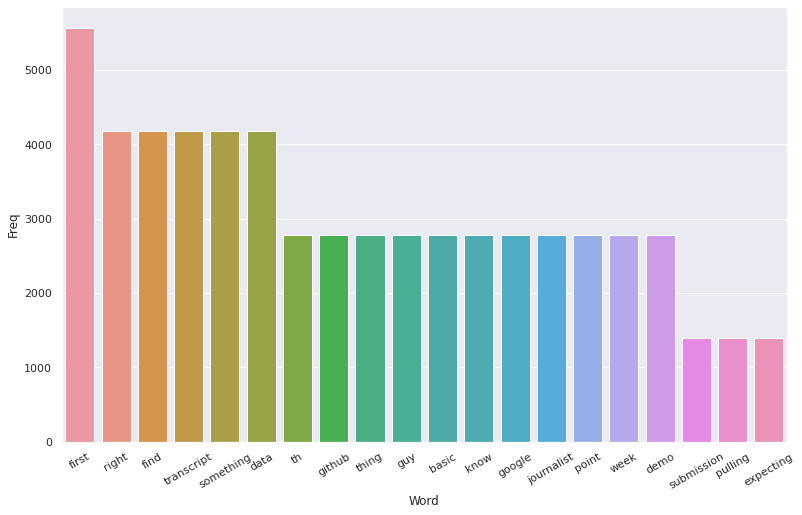

In [ ]:
# #Most frequently occuring words
# import pandas
# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in      
#                    vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                        reverse=True)
#     return words_freq[:n]
# #Convert most freq words to dataframe for plotting bar plot
# top_words = get_top_n_words(corpus, n=20)
# top_df = pandas.DataFrame(top_words)
# top_df.columns=["Word", "Freq"]
# #Barplot of most freq words
# import seaborn as sns
# sns.set(rc={'figure.figsize':(13,8)})
# g = sns.barplot(x="Word", y="Freq", data=top_df)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

             Bi-gram   Freq
0           data set  50148
1        fine tuning  23681
2          yeah yeah  18109
3        speech text  13930
4          fine tune  13930
5    transcript note  11144
6         data point   9751
7    text processing   8358
8          set found   8358
9   audio transcript   8358
10         okay cool   6965
11           let say   6965
12      news article   6965
13        right yeah   6965
14    something like   6965
15           yes yes   5572
16       github repo   5572
17       next sunday   5572
18          yes yeah   5572
19         find unit   5572


[Text(0, 0, 'data set'),
 Text(0, 0, 'fine tuning'),
 Text(0, 0, 'yeah yeah'),
 Text(0, 0, 'speech text'),
 Text(0, 0, 'fine tune'),
 Text(0, 0, 'transcript note'),
 Text(0, 0, 'data point'),
 Text(0, 0, 'text processing'),
 Text(0, 0, 'set found'),
 Text(0, 0, 'audio transcript'),
 Text(0, 0, 'okay cool'),
 Text(0, 0, 'let say'),
 Text(0, 0, 'news article'),
 Text(0, 0, 'right yeah'),
 Text(0, 0, 'something like'),
 Text(0, 0, 'yes yes'),
 Text(0, 0, 'github repo'),
 Text(0, 0, 'next sunday'),
 Text(0, 0, 'yes yeah'),
 Text(0, 0, 'find unit')]

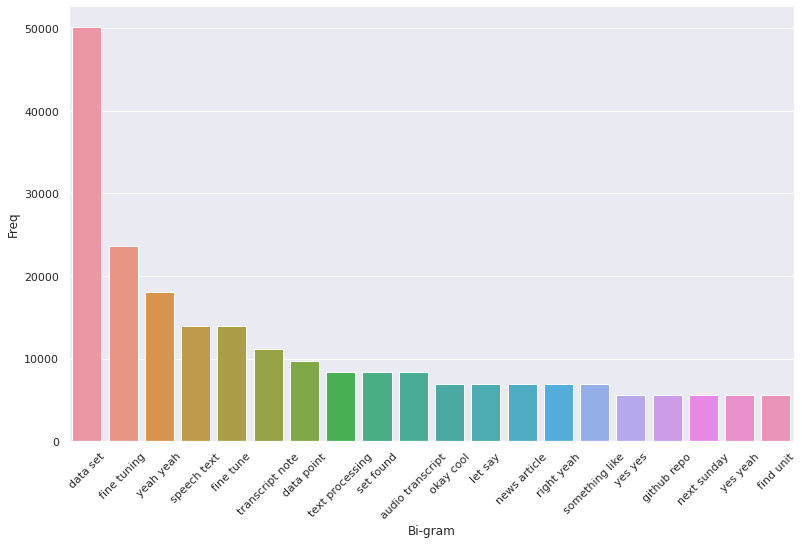

In [ ]:
# #Most frequently occuring Bi-grams
# def get_top_n2_words(corpus, n=None):
#     vec1 = CountVectorizer(ngram_range=(2,2),  
#             max_features=2000).fit(corpus)
#     bag_of_words = vec1.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     
#                   vec1.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                 reverse=True)
#     return words_freq[:n]
# top2_words = get_top_n2_words(corpus, n=20)
# top2_df = pandas.DataFrame(top2_words)
# top2_df.columns=["Bi-gram", "Freq"]
# print(top2_df)
# #Barplot of most freq Bi-grams
# import seaborn as sns
# sns.set(rc={'figure.figsize':(13,8)})
# h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
# h.set_xticklabels(h.get_xticklabels(), rotation=45)

                         Tri-gram  Freq
0             submission first th  1393
1                     first th th  1393
2                    th th github  1393
3               th github pulling  1393
4        github pulling expecting  1393
5    pulling expecting everything  1393
6   expecting everything somebody  1393
7      everything somebody github  1393
8            somebody github repo  1393
9               github repo first  1393
10               repo first thing  1393
11                first thing guy  1393
12              thing guy learned  1393
13              guy learned basic  1393
14             learned basic help  1393
15                basic help fill  1393
16                  help fill guy  1393
17                 fill guy right  1393
18               guy right python  1393
19             right python panda  1393


[Text(0, 0, 'submission first th'),
 Text(0, 0, 'first th th'),
 Text(0, 0, 'th th github'),
 Text(0, 0, 'th github pulling'),
 Text(0, 0, 'github pulling expecting'),
 Text(0, 0, 'pulling expecting everything'),
 Text(0, 0, 'expecting everything somebody'),
 Text(0, 0, 'everything somebody github'),
 Text(0, 0, 'somebody github repo'),
 Text(0, 0, 'github repo first'),
 Text(0, 0, 'repo first thing'),
 Text(0, 0, 'first thing guy'),
 Text(0, 0, 'thing guy learned'),
 Text(0, 0, 'guy learned basic'),
 Text(0, 0, 'learned basic help'),
 Text(0, 0, 'basic help fill'),
 Text(0, 0, 'help fill guy'),
 Text(0, 0, 'fill guy right'),
 Text(0, 0, 'guy right python'),
 Text(0, 0, 'right python panda')]

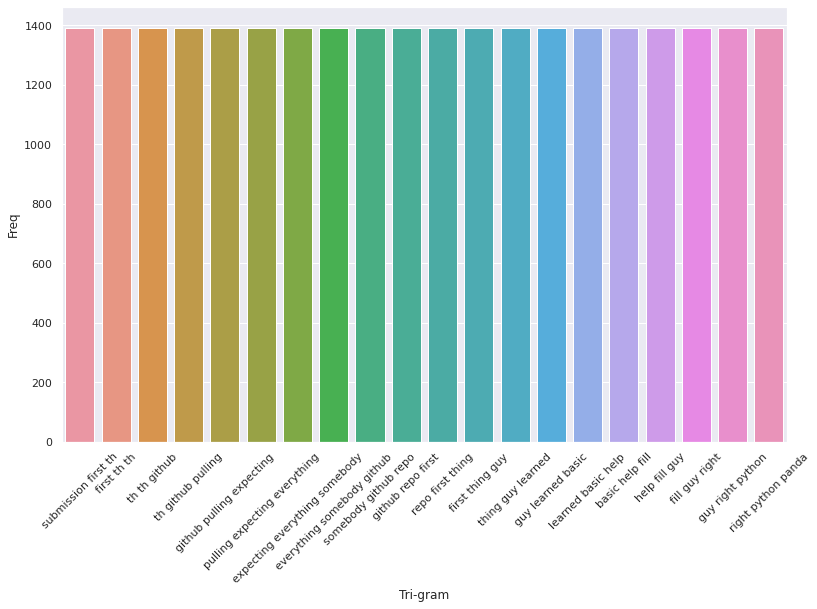

In [ ]:
# #Most frequently occuring Tri-grams
# def get_top_n3_words(corpus, n=None):
#     vec1 = CountVectorizer(ngram_range=(3,3), 
#            max_features=2000).fit(corpus)
#     bag_of_words = vec1.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     
#                   vec1.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                 reverse=True)
#     return words_freq[:n]
# top3_words = get_top_n3_words(corpus, n=20)
# top3_df = pandas.DataFrame(top3_words)
# top3_df.columns=["Tri-gram", "Freq"]
# print(top3_df)
# #Barplot of most freq Tri-grams
# import seaborn as sns
# sns.set(rc={'figure.figsize':(13,8)})
# j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
# j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
#print("\nAbstract:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Keywords:
first 0.204
transcript 0.153
something 0.153
right 0.153
find 0.153
data 0.153
week 0.102
thing 0.102
th 0.102
point 0.102


#TF-IDF

In [ ]:
from nltk import tokenize
from operator import itemgetter
import math
f = open("/content/Meet_Summary.txt", "r")
doc=f.read()
doc

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
total_words = doc.split()
total_word_length = len(total_words)
#print(total_word_length)
nltk.download('punkt')
total_sentences = tokenize.sent_tokenize(doc)
total_sent_len = len(total_sentences)
#print(total_sent_len)
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
#print(tf_score)

def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

# Performing a log and divide
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

#print(idf_score)

tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
print(tf_idf_score)

def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

no_of_keywords=int(input("How many keywords you want?"))
result=get_top_n(tf_idf_score, no_of_keywords)
result
print("Keywords:")
for k in result:
    print(k)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
{'"There': 0.009884109848746287, 'two': 0.0025203912855521564, 'submissions': 0.009884109848746287, 'The': 0.007788170568089272, 'first': 0.005040782571104313, 'one': 0.0, '18th': 0.009884109848746287, '21th': 0.009884109848746287, '': 0.0, 'GitHub,': 0.009884109848746287, "they're": 0.011538914164398121, 'pulling,': 0.009884109848746287, 'expecting': 0.009884109848746287, 'everything': 0.009884109848746287, 'somebody': 0.009884109848746287, 'GitHub': 0.009884109848746287, 'repo': 0.009884109848746287, 'thing': 0.001154686740279089, 'guys': 0.0033096086313036646, 'Learned': 0.009884109848746287, 'basics': 0.009884109848746287, 'of,': 0.009884109848746287, 'Just': 0.009884109848746287, 'help': 0.009884109848746287, 'fill': 0.009884109848746287, 'this,': 0.00988

#BERT 

In [ ]:
! pip install sentence-transformers
from sentence_transformers import SentenceTransformer

     |████████████████████████████████| 85 kB 1.9 MB/s 
     |████████████████████████████████| 2.5 MB 15.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.0 MB/s 
     |████████████████████████████████| 43 kB 834 kB/s 
     |████████████████████████████████| 895 kB 22.3 MB/s 
     |████████████████████████████████| 3.3 MB 32.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=40c1909fda9ad30c9087d9bb11d86d8f7bfe6015340450061c67e78989511f86
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 1)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
candidates = count.get_feature_names()

In [ ]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
keywords

['model',
 'organ',
 'skating',
 '18th',
 'github',
 '21th',
 'demo',
 'pandas',
 'python',
 'google']

# KeyBERT

In [ ]:
!pip install keybert

     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 208 kB 14.4 MB/s 
     |████████████████████████████████| 51 kB 9.4 MB/s 
     |████████████████████████████████| 2.6 MB 46.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 3.3 MB 45.8 MB/s 
     |████████████████████████████████| 636 kB 45.1 MB/s 
     |████████████████████████████████| 895 kB 39.1 MB/s 
  Created wheel for keybert: filename=keybert-0.4.0-py3-none-any.whl size=20358 sha256=40b350ec268701be9b1b753d85c7d29acf2a26a3c124bde1a7688284445e7c32
  Stored in directory: /root/.cache/pip/wheels/fe/e1/7f/8ee72e851e92320fba5c68d9e6e28d227671876429bc80f420
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=39cc51b8298a898990f4f8fa992249a0d1d0efcb1cfd91150a1c2e1790fa96c4
  Stored in directory: /root/.cache/pip/whee

In [ ]:
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]

     |████████████████████████████████| 448 kB 7.5 MB/s 
     |████████████████████████████████| 776.7 MB 4.5 kB/s 
     |████████████████████████████████| 1.3 MB 33.0 MB/s 
     |████████████████████████████████| 1.1 MB 9.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 64 kB 4.3 MB/s 
     |████████████████████████████████| 981 kB 17.9 MB/s 
     |████████████████████████████████| 788 kB 70.0 MB/s 
     |████████████████████████████████| 2.9 MB 26.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 80 kB 13.7 MB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
     |████████████████████████████████| 17.4 MB 125 kB/s 
     |████████████████████████████████| 17.3 MB 25 kB/s 
     |████████████████████████████████| 12.8 MB 12 kB/s 
     |████████████████████████████████| 12.7 MB 95 kB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116701 sha256

In [ ]:
from keybert import KeyBERT
f = open("/content/Meet_Summary.txt", "r")
doc=f.read()
# doc = """
#          Supervised learning is the machine learning task of learning a function that
#          maps an input to an output based on example input-output pairs. It infers a
#          function from labeled training data consisting of a set of training examples.
#          In supervised learning, each example is a pair consisting of an input object
#          (typically a vector) and a desired output value (also called the supervisory signal). 
#          A supervised learning algorithm analyzes the training data and produces an inferred function, 
#          which can be used for mapping new examples. An optimal scenario will allow for the 
#          algorithm to correctly determine the class labels for unseen instances. This requires 
#          the learning algorithm to generalize from the training data to unseen situations in a 
#          'reasonable' way (see inductive bias).
#       """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

In [ ]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)

[('steps', 0.4086),
 ('help', 0.3223),
 ('complete', 0.3189),
 ('github', 0.3189),
 ('pandas', 0.3178)]

# RAKE

In [ ]:
!git clone https://github.com/zelandiya/RAKE-tutorial

Cloning into 'RAKE-tutorial'...
remote: Enumerating objects: 303, done.
remote: Total 303 (delta 0), reused 0 (delta 0), pack-reused 303
Receiving objects: 100% (303/303), 4.31 MiB | 8.55 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
! pip install rake-nltk
from rake_nltk import Rake
import operator

In [ ]:
from rake_nltk import rake

In [ ]:
filepath = "/content/Meet_Summary.txt"
rake_object = rake.Rake(filepath)
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered.Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generatingsets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types of systems and systems of mixed types."
sample_file = open("/content/Meet_Summary.txt", "r")
keywords = rake_object.run(doc) 
print("Keywords:", keywords)

AttributeError: ignored